In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib as mpl
import pandas as pd
import numpy as np
from iminuit import Minuit
from scipy import stats
import time
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from Functions import *
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, nice_string_output, add_text_to_ax

In [28]:
path = '../../../KU/Bachelor+Research/Data/Piccaro/'
dates = ['07042024', '08042024', '11042024']

data = read_data_picarro(path, dates)
display(data['11042024'])

,DATE,TIME,FRAC_DAYS_SINCE_JAN1,FRAC_HRS_SINCE_JAN1,EPOCH_TIME,ALARM_STATUS,INST_STATUS,CavityPressure,CavityTemp,WarmBoxTemp,...,PPF_base_offset,PPF_slope_offset,PPF_shift,PPF_CH4_conc,PPF_H2O_conc,PPF_C2H6_conc,PPF_C2H4_conc,PPF_NH3_conc,PPF_H2S_conc,Seconds
0,2024-04-11,10:52:20.348,101.494680,2435.872319,1.712833e+09,0,963,148.002627,44.830835,45.002147,...,-0.011630,-0.339355,0.001767,1.999577,0.980639,1.060930,-0.001802,0.076319,29.510534,0.0
1,2024-04-11,10:52:24.801,101.494731,2435.873556,1.712833e+09,0,963,148.003784,44.841209,45.001640,...,-0.011155,-0.343924,0.001706,1.985728,0.980388,1.077387,-0.001723,0.078740,30.559589,4.0
2,2024-04-11,10:52:29.267,101.494783,2435.874797,1.712833e+09,0,963,147.994713,44.843808,45.001579,...,-0.007225,-0.305783,0.001733,1.990280,0.980985,1.134407,0.000004,0.076231,24.730181,9.0
3,2024-04-11,10:52:34.566,101.494845,2435.876269,1.712833e+09,0,963,148.005006,44.855012,45.001179,...,-0.023158,-0.346622,0.001582,1.988728,0.981452,1.144802,-0.003025,0.076424,31.869095,14.0
4,2024-04-11,10:52:39.032,101.494896,2435.877509,1.712833e+09,0,963,148.001022,44.856255,45.001122,...,0.036892,-0.300867,0.001657,1.984015,0.981634,1.026691,-0.004026,0.076435,27.611616,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,2024-04-11,13:20:41.384,101.597701,2438.344829,1.712842e+09,0,963,147.999948,44.999413,45.000206,...,-0.378685,-0.464437,0.000073,1.701560,0.365811,1.400591,0.000300,0.035838,30.072416,8901.0
1876,2024-04-11,13:20:45.846,101.597753,2438.346069,1.712842e+09,0,963,147.997284,44.999199,45.000359,...,-0.396981,-0.401302,0.000071,1.682764,0.368357,1.509166,0.004053,0.032347,28.666833,8905.0
1877,2024-04-11,13:20:50.318,101.597805,2438.347311,1.712842e+09,0,963,147.987146,44.999168,45.000237,...,-0.368088,-0.461330,0.000084,1.684326,0.371235,1.337274,0.001198,0.034277,31.426418,8910.0
1878,2024-04-11,13:20:55.569,101.597865,2438.348769,1.712842e+09,0,963,148.003560,44.999516,45.000411,...,-0.337588,-0.438786,0.000083,1.670890,0.375651,1.331701,-0.002743,0.036924,31.193533,8915.0


In [40]:
time_stamps = np.array([['17:36:31', '17:46:32', '17:51:31', '18:01:31', '18:06:34', '18:11:32'],
                        ['14:00:01', '14:10:31', '14:15:33', '14:26:31', '14:31:33', '14:41:31'],
                        ['12:30:03', '12:41:33', '12:46:30', '12:57:04', '13:02:01', '13:08:00']], dtype = object)

exp_keys = np.array([['before 070424', 'lamp 070424', 'after 070424'],
                     ['before 080424', 'lamp 080424', 'after 080424'],
                     ['before 110424', 'lamp 110424', 'after 110424']], dtype = object)

exp_treat = get_treatment_dict(data, time_stamps, exp_keys)
display(exp_treat.keys())

[array([ 942., 1069., 1132., 1259., 1323., 1386.]), array([1083., 1217., 1281., 1421., 1485., 1612.]), array([1232., 1378., 1441., 1575., 1638., 1714.])]


dict_keys(['before 070424', 'lamp 070424', 'after 070424', 'before 080424', 'lamp 080424', 'after 080424', 'before 110424', 'lamp 110424', 'after 110424'])

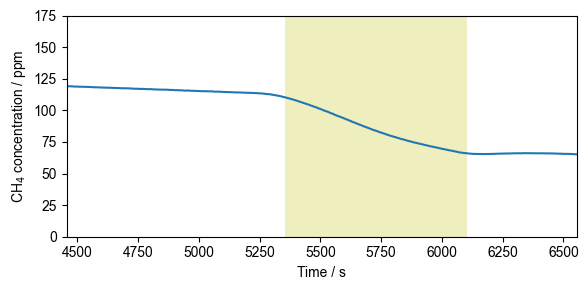

In [50]:
fig, ax = plt.subplots(figsize = (6, 3))

ax.plot(data['07042024']['Seconds'], data['07042024']['HR_12CH4'])
ax.axvspan(data['07042024']['Seconds'][1132], data['07042024']['Seconds'][1290], color='y', alpha=0.25, lw=0)

ax.set(xlim = (data['07042024']['Seconds'][942], data['07042024']['Seconds'][1386]), ylim = (0, 175),
       xlabel = 'Time / s', ylabel = 'CH$_{4}$ concentration / ppm')

fig.tight_layout()
fig.savefig('Full_exp_FeCl3.jpg', dpi = 600)
plt.show()

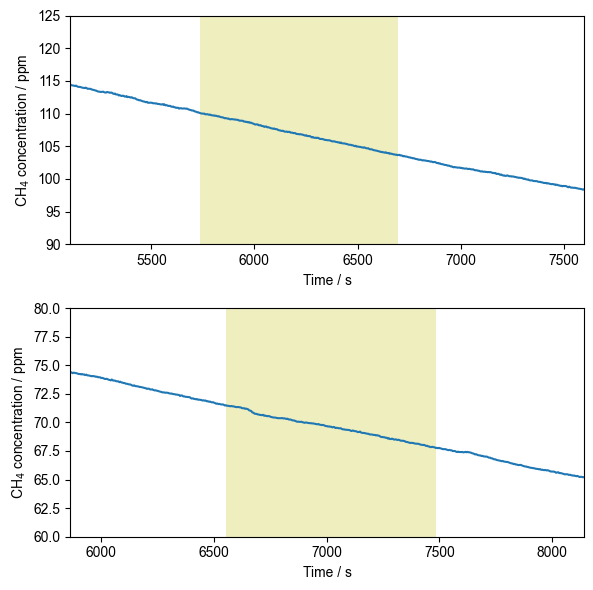

In [47]:
fig, ax = plt.subplots(2,1, figsize = (6, 6))

ax[0].plot(data['08042024']['Seconds'], data['08042024']['HR_12CH4'])
ax[0].axvspan(data['08042024']['Seconds'][1217], data['08042024']['Seconds'][1421], color='y', alpha=0.25, lw=0)

ax[0].set(xlim = (data['08042024']['Seconds'][1083], data['08042024']['Seconds'][1612]), ylim = (90, 125),
       xlabel = 'Time / s', ylabel = 'CH$_{4}$ concentration / ppm')

ax[1].plot(data['11042024']['Seconds'], data['11042024']['HR_12CH4'])
ax[1].axvspan(data['11042024']['Seconds'][1378], data['11042024']['Seconds'][1575], color='y', alpha=0.25, lw=0)

ax[1].set(xlim = (data['11042024']['Seconds'][1232], data['11042024']['Seconds'][1714]), ylim = (60, 80),
       xlabel = 'Time / s', ylabel = 'CH$_{4}$ concentration / ppm')

fig.tight_layout()
fig.savefig('Full_exp_dust.jpg', dpi = 600)
plt.show()

In [5]:
a_guess = np.array([-0.005, -0.005, -0.005])
b_guess = np.zeros(3) + 100

a, b, ea, eb, Chi2, ndf, prob = fit_exp(exp_treat, a_guess, b_guess)

before 070424  Fit: tau=-0.000059+-0.00002576  c_0=119.079+-1.059  p=1.000000
lamp 070424  Fit: tau=-0.000767+-0.00002584  c_0=223.493+-6.988  p=1.000000
after 070424  Fit: tau=-0.000030+-0.00007440  c_0=69.798+-10.134  p=1.000000


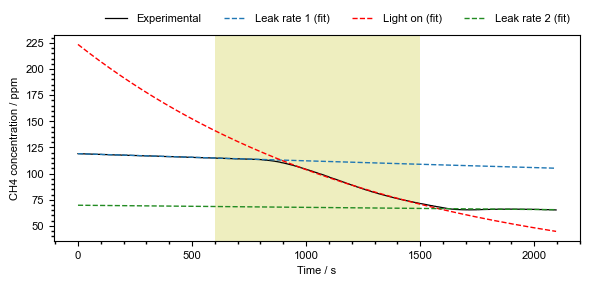

In [6]:
labels_full = ['Experimental', 'Leak rate 1 (fit)', 'Light on (fit)', 'Leak rate 2 (fit)']
fig, ax = plt.subplots(figsize = (6, 3))

plot_full_exp(ax, data['07042024'], a, b, [942, 1386], [1069, 1259])
ax.legend(labels = labels_full, frameon = False, fontsize = 8, ncol = 4, bbox_to_anchor = (1, 1.15))

fig.tight_layout()
fig.savefig('Full_exp_wFit.jpg', dpi = 600)
plt.show()

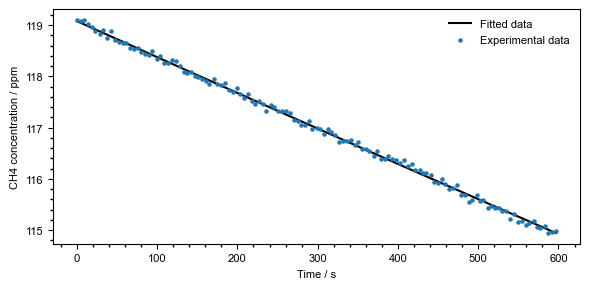

In [7]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_before_lamp(ax, exp_treat, a[0], b[0], 'before 070424')

fig.tight_layout()
fig.savefig('leak1.jpg', dpi = 600)
plt.show()

before radiation:  106.08910547415651 +- 5.411660103854399
after radiation:  65.84450056338747 +- 13.513372385033854


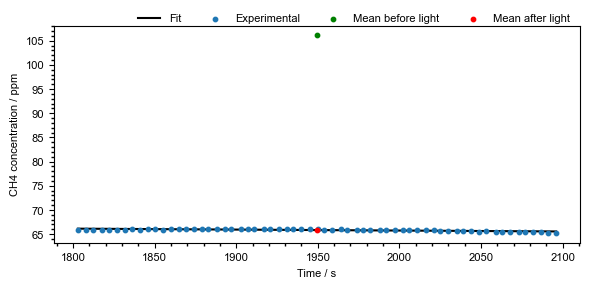

In [8]:
labels_after = ['Fit', 'Experimental', 'Mean before light', 'Mean after light']
fig, ax = plt.subplots(figsize = (6, 3))

exp1_y1, exp1_ey1, exp1_y2, exp1_ey2 = plot_mean_conc(ax, exp_treat['after 070424'], [a[0], a[2]], [b[0], b[2]], [ea[0], ea[2]], [eb[0], eb[2]])
ax.legend(labels = labels_after, frameon = False, fontsize = 8, bbox_to_anchor = (1, 1.1), ncol = 4)

fig.tight_layout()
fig.savefig('leak2.jpg', dpi = 600)
plt.show()